In [53]:
# https://stackoverflow.com/questions/25191620/
#   creating-lowpass-filter-in-scipy-understanding-methods-and-units

import numpy as np
from scipy.signal import butter, lfilter, freqz, filtfilt
from matplotlib import pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter1(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [7]:
# Filter requirements.
order1 = 3
order2 = 6
order3 = 9
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b1, a1 = butter_lowpass(cutoff, fs, order1)
b2, a2 = butter_lowpass(cutoff, fs, order2)
b3, a3 = butter_lowpass(cutoff, fs, order3)

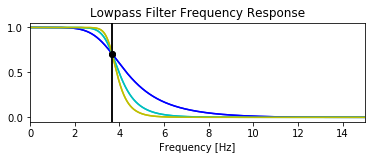

In [9]:
# Plot the frequency response.
w1, h1 = freqz(b1, a1, worN=8000)
w2, h2 = freqz(b2, a2, worN=8000)
w3, h3 = freqz(b3, a3, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h1), 'b')
plt.plot(0.5*fs*w/np.pi, np.abs(h2), 'c')
plt.plot(0.5*fs*w/np.pi, np.abs(h3), 'y')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

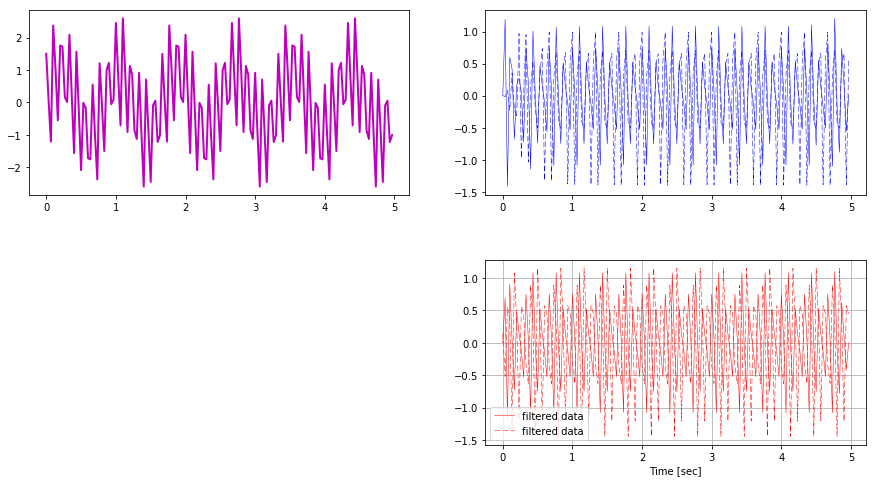

In [54]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0             # seconds
n = int(T * fs)     # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) \
        + 0.5*np.sin(12.0*2*np.pi*t)

data1 = np.sin(1.2*2*np.pi*t) \
       + 1.5*np.cos(9*2*np.pi*t) \
       + 0.5*np.sin(12.0*2*np.pi*t) \
       + 1.0*np.sin(15*2*np.pi*t) \
       + 1.0*np.cos(4*2*np.pi*t) 

# Filter the data, and plot both the original and filtered signals.




def FILTER(data,low_day=2.0, high_day=10.0, band_type='high_pass'):
    lowcut  = 4.0/(high_day*24) ## 1/days
    highcut = 4.0/(low_day*24) ## 1/days
    order   = ORDER
    if ((band_type == 'high_pass') or (band_type == 'monthly_pass')):
        b, a = butter(order, lowcut, btype='high')
    else :
        b, a = butter(order, [lowcut, highcut], btype='band')
    filtered_signal = lfilter(b, a, data)
    return filtered_signal

cutoff=4
y1 = butter_highpass_filter(data, 2, fs, 16)
y2 = butter_highpass_filter(data, 3, fs, 16)
y3 = butter_highpass_filter(data, 5, fs, 16)
y4 = butter_highpass_filter(data, 10, fs, 16)



plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.plot(t, data, 'm-', lw=2,label='data')
#plt.plot(t, data1, 'k-', lw=2,label='data')
plt.subplot(2,2,2)
plt.plot(t, butter_highpass_filter(data, 9, fs, 9), 'b-', linewidth=0.5, label='filtered data')
plt.plot(t, butter_highpass_filter1(data, 9, fs, 9), 'b--', linewidth=0.5, label='filtered data')

plt.subplot(2,2,4)
plt.plot(t, butter_highpass_filter(data, 9, fs, 3), 'r-', linewidth=0.5, label='filtered data')
plt.plot(t, butter_highpass_filter1(data, 9, fs, 3), 'r--', linewidth=0.5, label='filtered data')

# # plt.plot(t, y3, 'r-', linewidth=2, label='filtered data')
# # plt.plot(t, y4, 'k-', linewidth=2, label='filtered data')

plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()